# LAB 2.1: Perceptron & Podstawy Sieci Neuronowych

**Sztuczna Inteligencja - Semestr V**

**Prowadzący:** Łukasz Grala

---

## 🎯 Cele laboratorium:

1. ✅ Zrozumienie podstaw sieci neuronowych
2. ✅ Implementacja perceptronu od zera
3. ✅ Testowanie na prostych problemach (AND, OR, XOR)
4. ✅ Wizualizacja granic decyzyjnych
5. ✅ Multi-layer Perceptron dla XOR
6. ✅ Pierwsze zastosowanie na rzeczywistych danych (Iris)

---

## 📚 Wymagana wiedza:

- Python, NumPy
- Podstawy algebry liniowej (mnożenie macierzy)
- Pojęcie funkcji (input → output)

---

## Setup - Importy

In [13]:
# Podstawowe biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ustawienia
np.random.seed(42)
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

print("✓ Biblioteki załadowane!")
print(f"NumPy version: {np.__version__}")

✓ Biblioteki załadowane!
NumPy version: 2.3.5


---
## CZĘŚĆ 1: Teoria - Co to jest Perceptron?

### Czym jest perceptron?

**Perceptron** to najprostsza forma sztucznego neuronu, wynaleziona przez Franka Rosenblatta w 1958 roku.

**Struktura:**
```
    x₁ ─┐
        ├─→ Σ (suma ważona) ─→ f(z) ─→ output
    x₂ ─┤    z = w₁x₁ + w₂x₂ + b
        │
    xₙ ─┘
    
    gdzie:
    - x₁, x₂, ..., xₙ : inputs (cechy)
    - w₁, w₂, ..., wₙ : wagi (weights)
    - b : bias (próg)
    - f : funkcja aktywacji
    - z : suma ważona
```

**Funkcje aktywacji:**

1. **Step function** (perceptron klasyczny):
   ```
   f(z) = 1 jeśli z >= 0
          0 jeśli z < 0
   ```

2. **Sigmoid** (logistic):
   ```
   f(z) = 1 / (1 + e^(-z))
   ```

3. **ReLU** (Rectified Linear Unit):
   ```
   f(z) = max(0, z)
   ```

**Zastosowania:**
- Klasyfikacja binarna (2 klasy)
- Podstawowy building block dla sieci neuronowych
- Rozpoznawanie prostych wzorców

**Ograniczenia:**
- Tylko problemy liniowo separowalne
- Nie rozwiąże XOR!

---

## CZĘŚĆ 2: Implementacja Perceptronu 

### Zadanie 2.1: Klasa Perceptron

Zaimplementuj perceptron z algorytmem uczenia.

In [14]:
class Perceptron:
    """
    Perceptron - najprostsza sieć neuronowa
    
    Algorytm uczenia:
    1. Inicjalizuj wagi losowo (lub zerami)
    2. Dla każdego przykładu treningowego:
        a) Oblicz predykcję: y_pred = f(w·x + b)
        b) Oblicz błąd: error = y_true - y_pred
        c) Zaktualizuj wagi: w = w + learning_rate * error * x
        d) Zaktualizuj bias: b = b + learning_rate * error
    3. Powtarzaj aż do zbieżności lub max iteracji
    """
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        """
        Inicjalizacja perceptronu
        
        Parameters:
        -----------
        learning_rate : float
            Współczynnik uczenia (jak szybko uczymy się)
            Typowe wartości: 0.001 - 0.1
        n_iters : int
            Maksymalna liczba epok (iteracji przez cały dataset)
        """
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        """
        Trenowanie perceptronu
        
        Parameters:
        -----------
        X : array-like, shape = [n_samples, n_features]
            Dane treningowe
        y : array-like, shape = [n_samples]
            Etykiety (0 lub 1)
        """
        n_samples, n_features = X.shape
        
        # TODO 1: Inicjalizuj wagi zerami
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Konwertuj y do 0/1 jeśli potrzeba
        y_ = np.array(y)
        
        # TODO 2: Główna pętla uczenia
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Forward pass - oblicz predykcję
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Oblicz błąd
                error = y_[idx] - y_predicted
                
                # TODO 3: Update rule - zaktualizuj wagi i bias
                # Reguła: w = w + learning_rate * error * x
                self.weights += self.lr * error * x_i
                self.bias += self.lr * error
    
    def predict(self, X):
        """
        Predykcja dla nowych danych
        
        Parameters:
        -----------
        X : array-like, shape = [n_samples, n_features]
        
        Returns:
        --------
        y_pred : array, shape = [n_samples]
            Predykcje (0 lub 1)
        """
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    
    def _unit_step_func(self, x):
        """
        Step function - funkcja aktywacji
        
        Zwraca 1 jeśli x >= 0, inaczej 0
        """
        return np.where(x >= 0, 1, 0)

print("✓ Klasa Perceptron zaimplementowana!")

✓ Klasa Perceptron zaimplementowana!


### Zadanie 2.2: Test na AND gate

**Bramka AND:**
```
x1  x2  | output
-----------------
0   0   |   0
0   1   |   0
1   0   |   0
1   1   |   1
```

Czy perceptron potrafi nauczyć się tego?

In [15]:
# TODO 1: Przygotuj dane dla AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

print("AND Gate - Dane treningowe:")
print("X:")
print(X_and)
print("\ny (expected):")
print(y_and)

# TODO 2: Stwórz i wytrenuj perceptron
p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X_and, y_and)

# TODO 3: Testuj
predictions = p.predict(X_and)

print("\nPredykcje perceptronu:")
print(predictions)

# TODO 4: Sprawdź accuracy
accuracy = np.mean(predictions == y_and)
print(f"\nAccuracy: {accuracy * 100:.1f}%")

# TODO 5: Wyświetl nauczone wagi
print(f"\nNauczone wagi: {p.weights}")
print(f"Nauczony bias: {p.bias}")

AND Gate - Dane treningowe:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

y (expected):
[0 0 0 1]

Predykcje perceptronu:
[0 0 0 1]

Accuracy: 100.0%

Nauczone wagi: [0.2 0.1]
Nauczony bias: -0.20000000000000004


### Zadanie 2.3: Test na OR gate

**Bramka OR:**
```
x1  x2  | output
-----------------
0   0   |   0
0   1   |   1
1   0   |   1
1   1   |   1
```

In [16]:
# TODO 1: Dane dla OR gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

print("OR Gate - Dane treningowe:")
print(f"X:\n{X_or}")
print(f"\ny (expected):\n{y_or}")

# TODO 2: Trenuj perceptron
p_or = Perceptron(learning_rate=0.1, n_iters=10)
p_or.fit(X_or, y_or)

# TODO 3: Predykcje
predictions_or = p_or.predict(X_or)
print(f"\nPredykcje: {predictions_or}")
print(f"Accuracy: {np.mean(predictions_or == y_or) * 100:.1f}%")
print(f"\nWagi: {p_or.weights}, Bias: {p_or.bias}")

OR Gate - Dane treningowe:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

y (expected):
[0 1 1 1]

Predykcje: [0 1 1 1]
Accuracy: 100.0%

Wagi: [0.1 0.1], Bias: -0.1


### Zadanie 2.4: Test na XOR gate - **PROBLEM!**

**Bramka XOR:**
```
x1  x2  | output
-----------------
0   0   |   0
0   1   |   1
1   0   |   1
1   1   |   0
```

**Pytanie:** Czy perceptron potrafi nauczyć się XOR?

**Odpowiedź:** **NIE!** XOR nie jest liniowo separowalny.

Sprawdźmy to:

In [17]:
# TODO 1: Dane dla XOR
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

print("XOR Gate - Dane treningowe:")
print(f"X:\n{X_xor}")
print(f"\ny (expected):\n{y_xor}")

# TODO 2: Trenuj perceptron
p_xor = Perceptron(learning_rate=0.1, n_iters=100)  # Więcej iteracji
p_xor.fit(X_xor, y_xor)

# TODO 3: Predykcje
predictions_xor = p_xor.predict(X_xor)
print(f"\nPredykcje: {predictions_xor}")
print(f"Expected:  {y_xor}")
print(f"Accuracy: {np.mean(predictions_xor == y_xor) * 100:.1f}%")

print("\n❌ Perceptron NIE MOŻE nauczyć się XOR!")
print("Problem XOR wymaga Multi-Layer Perceptron (MLP)")

XOR Gate - Dane treningowe:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

y (expected):
[0 1 1 0]

Predykcje: [1 1 0 0]
Expected:  [0 1 1 0]
Accuracy: 50.0%

❌ Perceptron NIE MOŻE nauczyć się XOR!
Problem XOR wymaga Multi-Layer Perceptron (MLP)


---
## CZĘŚĆ 3: Wizualizacja Granic Decyzyjnych

### Zadanie 3.1: Funkcja wizualizująca

Stwórz funkcję która rysuje granicę decyzyjną perceptronu.

In [18]:
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    """
    Rysuje granicę decyzyjną dla perceptronu (2D)
    
    Granica decyzyjna to linia gdzie: w₁x₁ + w₂x₂ + b = 0
    """
    # Stwórz siatkę punktów
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )
    
    # Predykcja dla każdego punktu siatki
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Rysuj
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=200, edgecolors='black', 
                cmap='RdYlBu', linewidths=2)
    plt.xlabel('x₁', fontsize=12)
    plt.ylabel('x₂', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Rysuj linię decyzyjną
    # w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1*x1 + b) / w2
    if model.weights[1] != 0:
        x1_line = np.linspace(x_min, x_max, 100)
        x2_line = -(model.weights[0] * x1_line + model.bias) / model.weights[1]
        plt.plot(x1_line, x2_line, 'k--', linewidth=2, label='Decision Boundary')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

print("✓ Funkcja wizualizacji gotowa!")

✓ Funkcja wizualizacji gotowa!


### Zadanie 3.2: Wizualizuj AND, OR i XOR

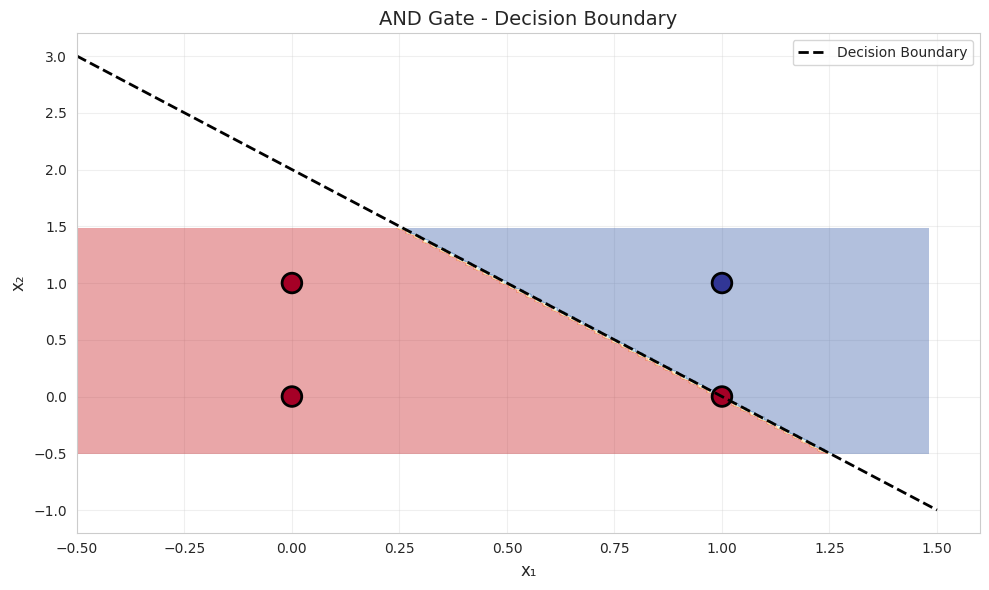

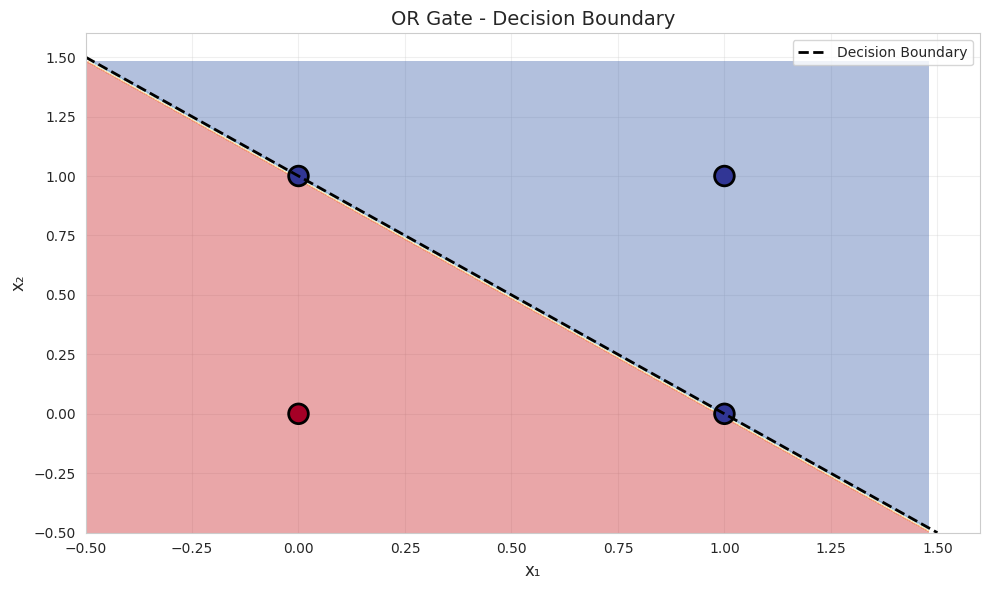

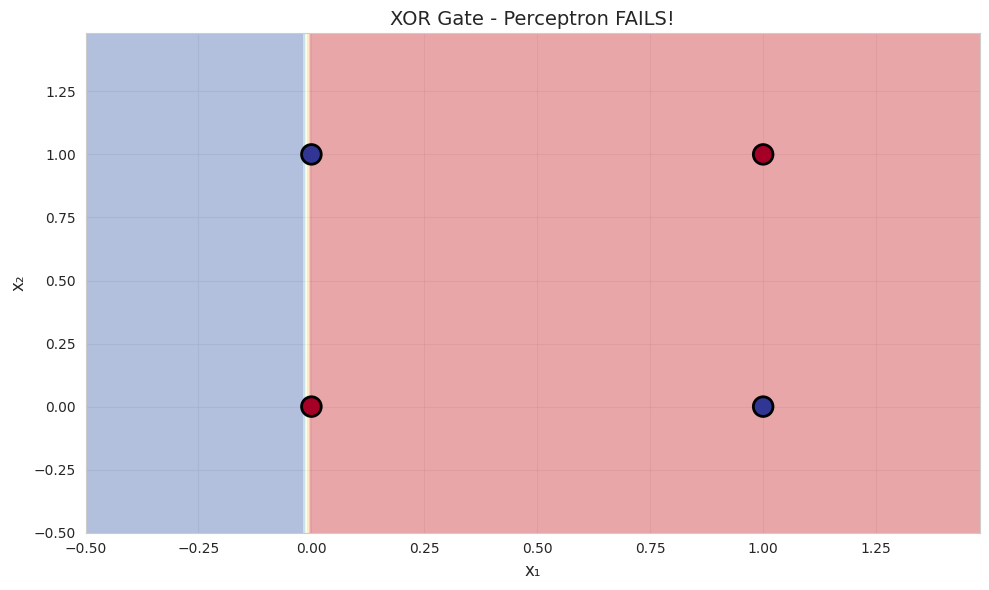


📊 Obserwacje:
- AND i OR: Liniowo separowalne ✓
- XOR: Nie da się rozdzielić linią prostą ✗
- Potrzebujemy więcej warstw (MLP)!


In [19]:
# TODO 1: Wizualizuj AND gate
plot_decision_boundary(X_and, y_and, p, "AND Gate - Decision Boundary")

# TODO 2: Wizualizuj OR gate
plot_decision_boundary(X_or, y_or, p_or, "OR Gate - Decision Boundary")

# TODO 3: Wizualizuj XOR gate
plot_decision_boundary(X_xor, y_xor, p_xor, "XOR Gate - Perceptron FAILS!")

print("\n📊 Obserwacje:")
print("- AND i OR: Liniowo separowalne ✓")
print("- XOR: Nie da się rozdzielić linią prostą ✗")
print("- Potrzebujemy więcej warstw (MLP)!")

---
## CZĘŚĆ 4: Multi-Layer Perceptron dla XOR

### Zadanie 4.1: Implementacja MLP

**MLP (Multi-Layer Perceptron)** = sieć z warstwą ukrytą (hidden layer)

**Architektura:**
```
Input (2) → Hidden (4, ReLU) → Output (1, Sigmoid)
```

**Forward Propagation:**
1. z₁ = W₁ · x + b₁
2. a₁ = ReLU(z₁)
3. z₂ = W₂ · a₁ + b₂
4. a₂ = Sigmoid(z₂)

**Backpropagation:**
1. Oblicz gradient dla output layer
2. Propaguj błąd wstecz do hidden layer
3. Zaktualizuj wagi

In [20]:
class MLP:
    """
    Multi-Layer Perceptron z 1 hidden layer
    
    Architecture: Input → Hidden (ReLU) → Output (Sigmoid)
    """
    
    def __init__(self, n_input, n_hidden, n_output, learning_rate=0.1):
        """
        Inicjalizacja MLP
        
        Parameters:
        -----------
        n_input : int
            Liczba neuronów wejściowych (features)
        n_hidden : int
            Liczba neuronów w hidden layer
        n_output : int
            Liczba neuronów wyjściowych (zwykle 1 dla binary classification)
        learning_rate : float
            Współczynnik uczenia
        """
        # TODO 1: Inicjalizacja wag (Xavier initialization)
        self.W1 = np.random.randn(n_input, n_hidden) * np.sqrt(2. / n_input)
        self.b1 = np.zeros((1, n_hidden))
        
        self.W2 = np.random.randn(n_hidden, n_output) * np.sqrt(2. / n_hidden)
        self.b2 = np.zeros((1, n_output))
        
        self.lr = learning_rate
        
        # Cache dla backward pass
        self.cache = {}
    
    def sigmoid(self, x):
        """Sigmoid activation: σ(x) = 1 / (1 + e^(-x))"""
        # Clip x aby uniknąć overflow
        x_clipped = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x_clipped))
    
    def sigmoid_derivative(self, x):
        """Pochodna sigmoid: σ'(x) = σ(x) * (1 - σ(x))"""
        return x * (1 - x)
    
    def relu(self, x):
        """ReLU activation: ReLU(x) = max(0, x)"""
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        """Pochodna ReLU: 1 jeśli x > 0, inaczej 0"""
        return (x > 0).astype(float)
    
    def forward(self, X):
        """
        Forward propagation
        
        Returns: output
        """
        # TODO 2: Layer 1 (hidden layer)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        
        # TODO 3: Layer 2 (output layer)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output):
        """
        Backpropagation - oblicza gradienty i aktualizuje wagi
        
        Wzory:
        - Output layer: dL/dW2 = a1.T @ (output - y)
        - Hidden layer: dL/dW1 = X.T @ (dz1)
            gdzie dz1 = (output - y) @ W2.T * relu'(a1)
        """
        m = X.shape[0]
        
        # TODO 4: Gradienty dla output layer
        # Dla Binary Cross-Entropy + Sigmoid, gradient = output - y
        dz2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        # TODO 5: Gradienty dla hidden layer
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.relu_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        # TODO 6: Update wag (gradient descent)
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
    
    def train(self, X, y, epochs=10000, verbose=True):
        """
        Trenowanie sieci
        
        Parameters:
        -----------
        X : array, shape = [n_samples, n_features]
        y : array, shape = [n_samples, 1]
        epochs : int
            Liczba epok
        verbose : bool
            Czy wyświetlać progress
        
        Returns:
        --------
        losses : list
            Historia funkcji straty
        """
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Oblicz loss (Binary Cross-Entropy)
            loss = -np.mean(y * np.log(output + 1e-8) + 
                           (1 - y) * np.log(1 - output + 1e-8))
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, output)
            
            # Wyświetl progress
            if verbose and epoch % 1000 == 0:
                print(f"Epoch {epoch:5d}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        """Predykcja (0 lub 1)"""
        output = self.forward(X)
        return (output > 0.5).astype(int)

print("✓ Klasa MLP zaimplementowana!")

✓ Klasa MLP zaimplementowana!


### Zadanie 4.2: Rozwiązanie XOR z MLP

In [21]:
# Dane XOR
X_xor_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor_train = np.array([[0], [1], [1], [0]])

print("XOR - Dane treningowe:")
print(f"X:\n{X_xor_train}")
print(f"\ny:\n{y_xor_train.flatten()}")

# TODO 1: Stwórz MLP
mlp = MLP(n_input=2, n_hidden=4, n_output=1, learning_rate=0.1)

print("\n🔄 Trening MLP dla XOR...")
# TODO 2: Trenuj
losses = mlp.train(X_xor_train, y_xor_train, epochs=10000, verbose=True)

# TODO 3: Testuj
predictions = mlp.predict(X_xor_train)
print(f"\n=== WYNIKI ===")
print(f"Predykcje: {predictions.flatten()}")
print(f"Expected:  {y_xor_train.flatten()}")
print(f"Accuracy:  {np.mean(predictions == y_xor_train) * 100:.1f}%")

print("\n✅ MLP ROZWIĄZAŁ XOR!")

XOR - Dane treningowe:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

y:
[0 1 1 0]

🔄 Trening MLP dla XOR...
Epoch     0, Loss: 0.8147
Epoch  1000, Loss: 0.0770
Epoch  2000, Loss: 0.0191
Epoch  3000, Loss: 0.0101
Epoch  4000, Loss: 0.0067
Epoch  5000, Loss: 0.0050
Epoch  6000, Loss: 0.0039
Epoch  7000, Loss: 0.0032
Epoch  8000, Loss: 0.0027
Epoch  9000, Loss: 0.0024

=== WYNIKI ===
Predykcje: [0 1 1 0]
Expected:  [0 1 1 0]
Accuracy:  100.0%

✅ MLP ROZWIĄZAŁ XOR!


### Zadanie 4.3: Wizualizacja uczenia

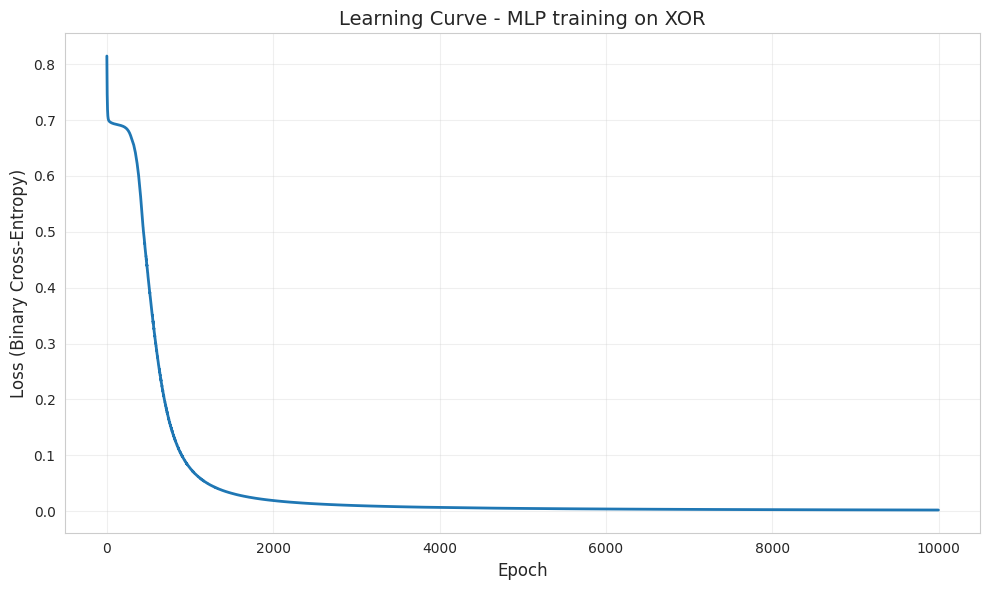

📉 Loss maleje - sieć się uczy!


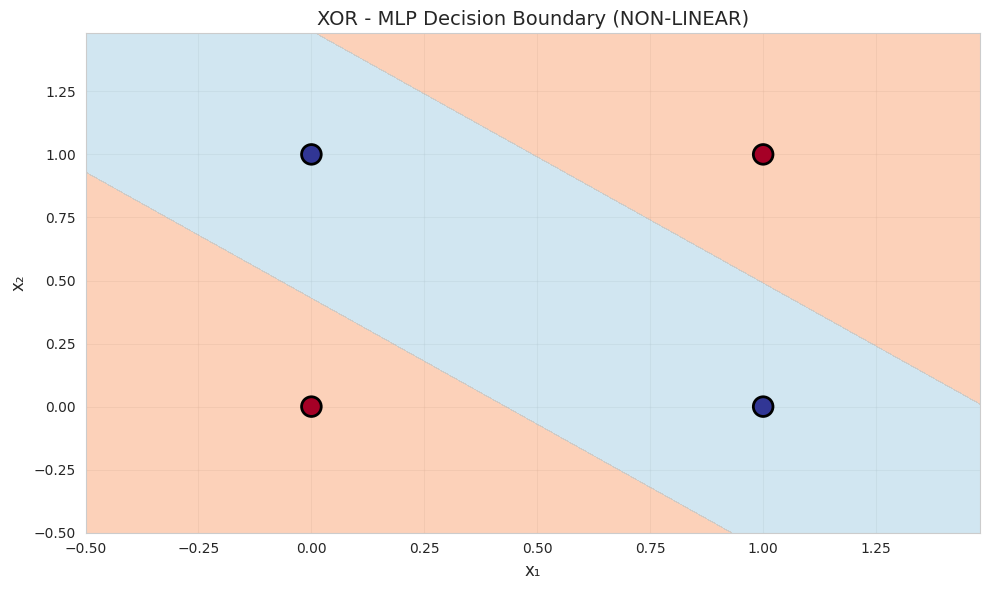

🎨 MLP tworzy nieliniową granicę decyzyjną!


In [22]:
# TODO 1: Learning curve
plt.figure(figsize=(10, 6))
plt.plot(losses, linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
plt.title('Learning Curve - MLP training on XOR', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📉 Loss maleje - sieć się uczy!")

# TODO 2: Wizualizuj granicę decyzyjną MLP
def plot_mlp_boundary(X, y, model, title="MLP Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu', levels=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=200, edgecolors='black',
                cmap='RdYlBu', linewidths=2)
    plt.xlabel('x₁', fontsize=12)
    plt.ylabel('x₂', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Wizualizuj
plot_mlp_boundary(X_xor_train, y_xor_train.flatten(), mlp, 
                  "XOR - MLP Decision Boundary (NON-LINEAR)")

print("🎨 MLP tworzy nieliniową granicę decyzyjną!")

---
## CZĘŚĆ 5: Zastosowanie na Iris Dataset

### Zadanie 5.1: Wczytaj i przygotuj dane

In [23]:
# Wczytaj Iris dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # Użyjemy tylko 2 pierwszych cech (dla wizualizacji)
y_iris = (iris.target == 0).astype(int).reshape(-1, 1)  # Binary: setosa vs rest

print("Iris Dataset:")
print(f"Features shape: {X_iris.shape}")
print(f"Target shape: {y_iris.shape}")
print(f"\nKlasy (pierwsze 10):")
print(y_iris[:10].flatten())

# TODO 1: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

# TODO 2: Skalowanie
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTrain set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

Iris Dataset:
Features shape: (150, 2)
Target shape: (150, 1)

Klasy (pierwsze 10):
[1 1 1 1 1 1 1 1 1 1]

Train set: (120, 2)
Test set: (30, 2)


### Zadanie 5.2: Trenuj MLP na Iris

🔄 Trening MLP na Iris dataset...
✓ Trening zakończony!

Train Accuracy: 100.00%
Test Accuracy: 96.67%


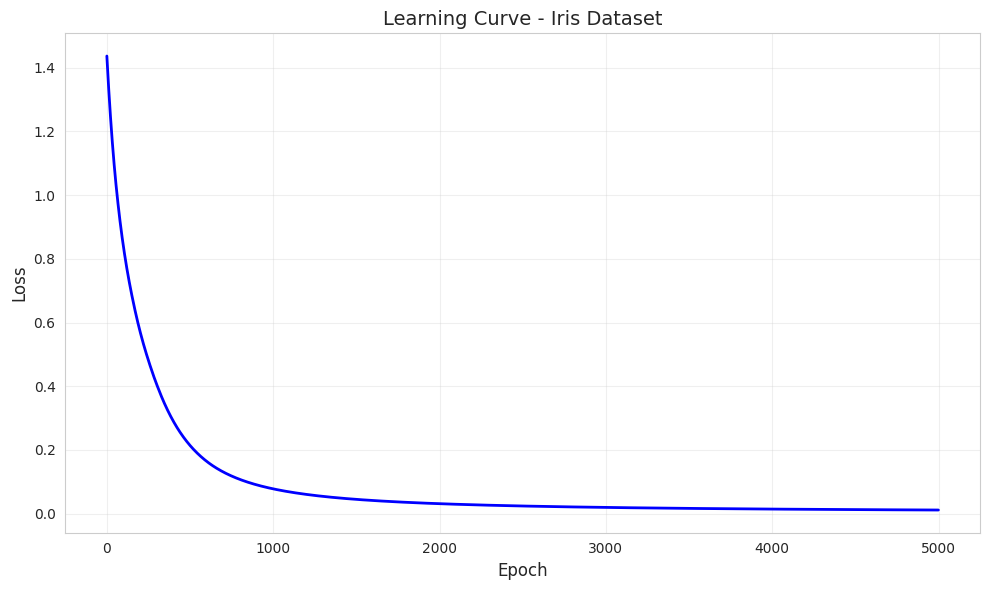

In [24]:
# TODO 1: Stwórz MLP
mlp_iris = MLP(n_input=2, n_hidden=8, n_output=1, learning_rate=0.01)

print("🔄 Trening MLP na Iris dataset...")
# TODO 2: Trenuj
losses_iris = mlp_iris.train(X_train_scaled, y_train, epochs=5000, verbose=False)

print("✓ Trening zakończony!")

# TODO 3: Ewaluacja na train set
train_pred = mlp_iris.predict(X_train_scaled)
train_accuracy = np.mean(train_pred == y_train) * 100
print(f"\nTrain Accuracy: {train_accuracy:.2f}%")

# TODO 4: Ewaluacja na test set
test_pred = mlp_iris.predict(X_test_scaled)
test_accuracy = np.mean(test_pred == y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# TODO 5: Learning curve
plt.figure(figsize=(10, 6))
plt.plot(losses_iris, linewidth=2, color='blue')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Learning Curve - Iris Dataset', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Zadanie 5.3: Wizualizacja wyników

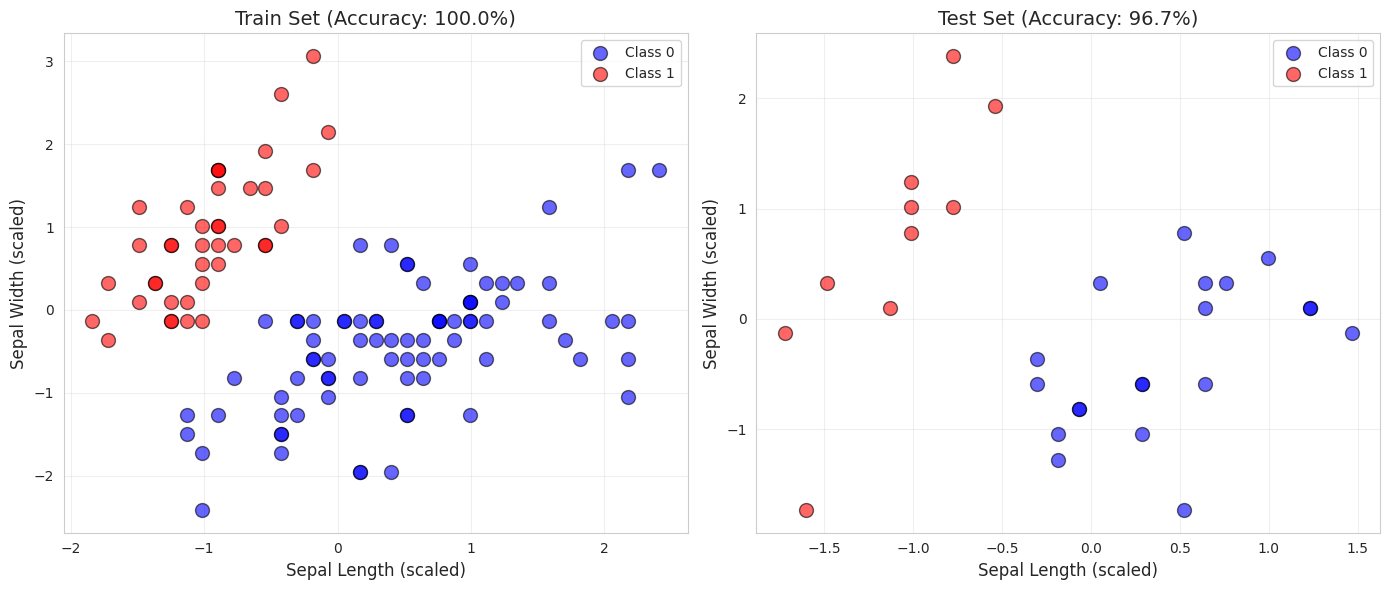

NameError: name 'plot_mlp_boundary' is not defined

In [12]:
# TODO 1: Scatter plot - actual vs predicted
plt.figure(figsize=(14, 6))

# Train set
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[y_train.flatten() == 0, 0], 
           X_train_scaled[y_train.flatten() == 0, 1],
           c='blue', label='Class 0', s=100, alpha=0.6, edgecolors='black')
plt.scatter(X_train_scaled[y_train.flatten() == 1, 0], 
           X_train_scaled[y_train.flatten() == 1, 1],
           c='red', label='Class 1', s=100, alpha=0.6, edgecolors='black')
plt.xlabel('Sepal Length (scaled)', fontsize=12)
plt.ylabel('Sepal Width (scaled)', fontsize=12)
plt.title(f'Train Set (Accuracy: {train_accuracy:.1f}%)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Test set
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[y_test.flatten() == 0, 0], 
           X_test_scaled[y_test.flatten() == 0, 1],
           c='blue', label='Class 0', s=100, alpha=0.6, edgecolors='black')
plt.scatter(X_test_scaled[y_test.flatten() == 1, 0], 
           X_test_scaled[y_test.flatten() == 1, 1],
           c='red', label='Class 1', s=100, alpha=0.6, edgecolors='black')
plt.xlabel('Sepal Length (scaled)', fontsize=12)
plt.ylabel('Sepal Width (scaled)', fontsize=12)
plt.title(f'Test Set (Accuracy: {test_accuracy:.1f}%)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# TODO 2: Decision boundary
plot_mlp_boundary(X_test_scaled, y_test.flatten(), mlp_iris,
                  "Iris Dataset - MLP Decision Boundary")

---
## PODSUMOWANIE LAB 2.1

### Czego się nauczyłeś:

✅ **Teoria:**
- Czym jest perceptron
- Jak działa algorytm uczenia
- Pojęcie funkcji aktywacji
- Liniowa separowalność

✅ **Praktyka:**
- Implementacja perceptronu od zera
- Testowanie na AND, OR, XOR
- Wizualizacja granic decyzyjnych
- Problem XOR i jego rozwiązanie

✅ **MLP:**
- Multi-layer perceptron
- Forward i backward propagation
- Nieliniowe granice decyzyjne
- Zastosowanie na rzeczywistych danych

---

### Kluczowe wnioski:

1. **Perceptron** może rozwiązać tylko problemy **liniowo separowalne**
2. **XOR** wymaga sieci wielowarstwowej (MLP)
3. **Hidden layer** pozwala nauczyć się nieliniowych wzorców
4. **Backpropagation** to kluczowy algorytm uczenia głębokich sieci

---

### Na następne zajęcia (Lab 2.2):

**Temat:** MLP & Backpropagation (szczegółowo)

**Będziemy omawiać:**
- Matematyka backpropagation krok po kroku
- Różne optimizers (SGD, Momentum, Adam)
- Weight initialization
- Problem znikającego gradientu
- Mini-batch training
- MNIST classification

**Przygotuj się:**
- Powtórz pochodne (chain rule)
- Gradient descent
- Matrix multiplication

---

### Zadanie:

1. ✅ Eksperymentuj z różnymi learning rates dla MLP
2. ✅ Spróbuj różnej liczby neuronów w hidden layer (2, 4, 8, 16)
3. ✅ Użyj wszystkich 4 cech z Iris (zamiast 2)
4. ✅ Zaimplementuj perceptron dla multi-class classification (3 klasy Iris)
5. ✅ Poczytaj o backpropagation przed następnymi zajęciami

---

**Kontakt:** lukasz.grala@cdv.pl

**Materiały:**
- Nielsen, M.: "Neural Networks and Deep Learning" (darmowy online)
- 3Blue1Brown: "Neural Networks" (YouTube)
- Coursera: Andrew Ng "Machine Learning"

**Powodzenia!** 🚀🧠


Podsumowanie: Zadania pokazują jak z prostych konceptów i zagadnień budowane są skomplikowane mechanizmy i rozwiązania. Dużo teorii, która "otwiera oczy" na ML.
